In [8]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import matplotlib.pyplot as plt
import random

In [9]:
data = gpd.read_file("C:/src/Python/DataVisualizationProjects/HistoricalMaps/WW2 Countries Shape File/cshapes.shp")
# data.head()

In [10]:
data.head(3)

,CNTRY_NAME,AREA,CAPNAME,CAPLONG,CAPLAT,FEATUREID,COWCODE,COWSYEAR,COWSMONTH,COWSDAY,...,GWSMONTH,GWSDAY,GWEYEAR,GWEMONTH,GWEDAY,ISONAME,ISO1NUM,ISO1AL2,ISO1AL3,geometry
0,Guyana,211982.004988,Georgetown,-58.2,6.800000,0,110,1966,5,26,...,5,26,2016,6,30,Guyana,328,GY,GUY,"POLYGON ((-58.17262 6.81222, -58.15494 6.82819..."
1,Suriname,145952.274029,Paramaribo,-55.2,5.833333,1,115,1975,11,25,...,11,25,2016,6,30,Suriname,740,SR,SUR,"POLYGON ((-55.12796 5.82217, -55.10445 5.83945..."
2,Trinidad and Tobago,5041.728952,Port-of-Spain,-61.5,10.650000,2,52,1962,8,31,...,8,31,2016,6,30,Trinidad and Tobago,780,TT,TTO,"MULTIPOLYGON (((-61.07945 10.82416, -61.07556 ..."


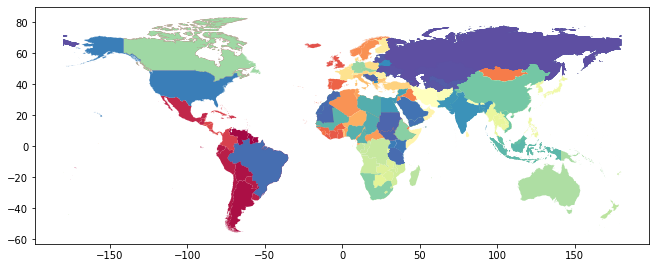

In [11]:
data.plot(figsize=(11, 6), cmap="Spectral")

In [6]:
values = []
country_map = {}

random.seed(a=100, version=2)

def get_rand_num():
    v = random.randrange(2000, 4000)
    while v in values:
        v = random.randrange(2000, 4000)
        if v not in values:
            values.append(v)
    return v
for i, row in data.iterrows():
    name = row["CNTRY_NAME"]
    value = get_rand_num()
    if row["CNTRY_NAME"] == "Russia":
        row["CNTRY_NAME"] = "USSR"
    if name in country_map.keys():
        value = country_map[name]
    else:
        country_map[name] = value
    row["AREA"] = value
    
    data.iloc[i] = row
# country_map

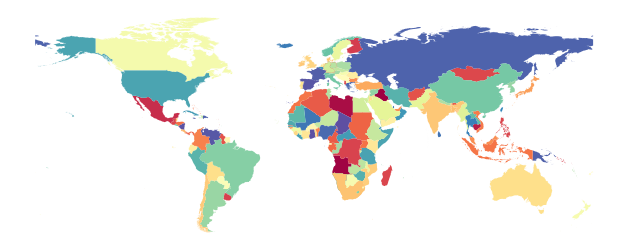

In [7]:
year = 1990
df = data[((data["COWSYEAR"] <= year)&(data["COWEYEAR"] >= year) & (data["COWEYEAR"] != -1)) | \
          ((data["GWEYEAR"] <= year)&(data["GWSYEAR"] >= year) & (data["GWEYEAR"] != -1))]
plo = df.plot(column=df["AREA"], figsize=(11, 6), cmap="Spectral")
plo.axis('off')
fig = plo.figure
fig.savefig("main.png", dpi=900, quality=100)

In [5]:
# data[data.groupby('CNTRY_NAME')['CNTRY_NAME'].transform('size') > 1].head(50)
# data.head()

In [6]:
# fig = data.plot(column=data["AREA"], figsize=(8, 8), cmap="Spectral").figure
# fig.savefig("main.png", dpi=900, quality=100)

In [7]:
# year = 1990
# data[((data["COWSYEAR"] < year)|(data["GWSYEAR"] < year)) & ((data["GWEYEAR"] > year)|(data["COWEYEAR"] > year))] \
# .plot(figsize=(100, 20), cmap="Spectral")

In [8]:
# year = 1991
# data[((data["COWSYEAR"] < year)|(data["GWSYEAR"] < year)) & ((data["GWEYEAR"] >= year)|(data["COWEYEAR"] >= year))] \
# .plot(figsize=(20, 20), cmap="Spectral")

In [9]:
existing = []
base = "./years_formatted/"
for root, dirs, files in os.walk(base):
    for filename in files:
        existing.append(base+filename)
existing[:4]

['./years_formatted/1946.png',
 './years_formatted/1947.png',
 './years_formatted/1948.png',
 './years_formatted/1949.png']

In [10]:
# data.plot(cmap="Spectral")

./years_formatted/2005.png
./years_formatted/2006.png
./years_formatted/2007.png
./years_formatted/2008.png
./years_formatted/2009.png
./years_formatted/2010.png
./years_formatted/2011.png
./years_formatted/2012.png
./years_formatted/2013.png
./years_formatted/2014.png
./years_formatted/2015.png


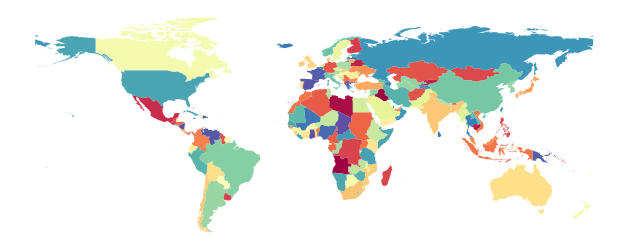

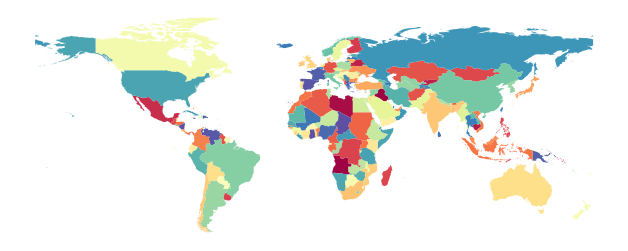

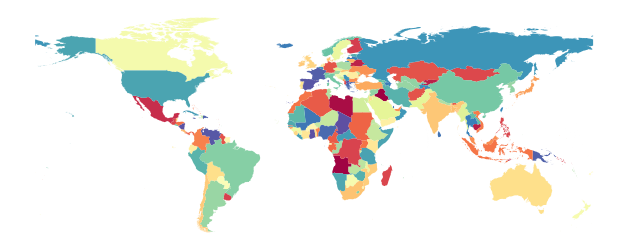

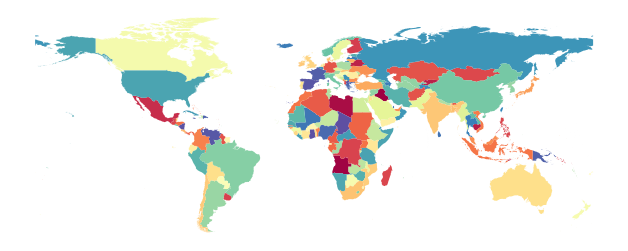

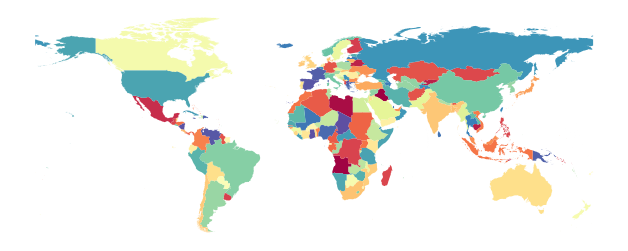

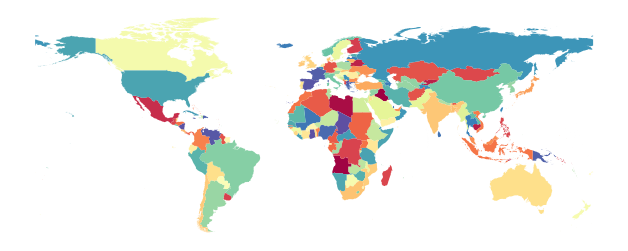

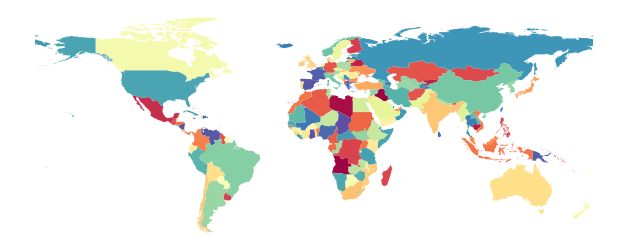

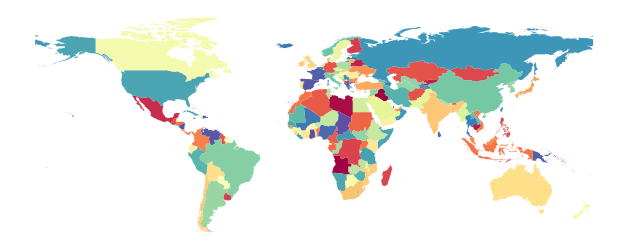

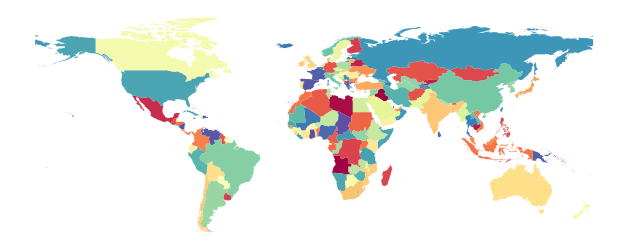

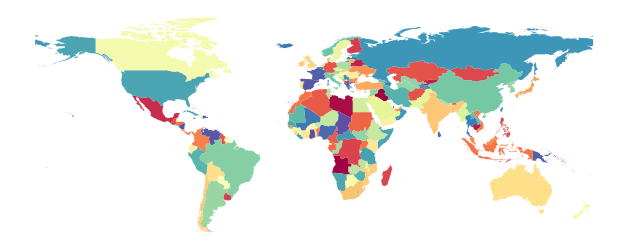

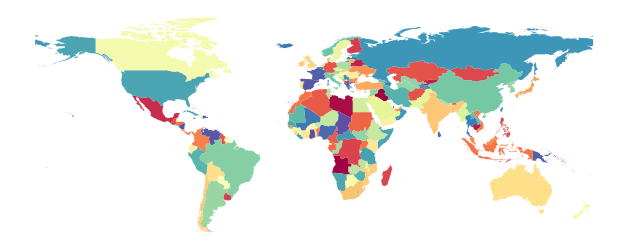

In [11]:
for year in range(1946, 2016):
    filename = base + str(year)+".png"
    if filename not in existing:
        print(filename)
        df = data[((data["COWSYEAR"] <= year)&(data["COWEYEAR"] >= year) & (data["COWEYEAR"] != -1)) | \
          ((data["GWEYEAR"] <= year)&(data["GWSYEAR"] >= year) & (data["GWEYEAR"] != -1))]
        plo = df.plot(column=df["AREA"], figsize=(11, 6), cmap="Spectral")
        plo.axis('off')
        fig = plo.figure
        fig.savefig(filename, dpi=900, quality=100)


In [ ]:
df = data[data["CNTRY_NAME"] == "Canada"]
fig = df.plot(figsize=(8, 8)).figure
fig.savefig("images/Canada.png", dpi=900, quality=100)

In [5]:
data.describe()

,AREA,CAPLONG,CAPLAT,FEATUREID,COWCODE,COWSYEAR,COWSMONTH,COWSDAY,COWEYEAR,COWEMONTH,COWEDAY,GWCODE,GWSYEAR,GWSMONTH,GWSDAY,GWEYEAR,GWEMONTH,GWEDAY,ISO1NUM
count,2.550000e+02,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,1.583208e+06,25.402307,20.920010,127.682353,470.988235,1966.843137,5.411765,9.713725,1936.968627,5.807843,27.345098,470.545098,1911.105882,5.180392,8.686275,1953.078431,6.011765,27.603922,426.505882
std,4.326390e+06,60.968525,23.962463,74.203945,264.448520,18.745469,4.061421,10.060467,371.815930,1.991700,7.828283,261.335254,322.381078,3.974179,9.943720,329.353521,1.932895,7.242970,286.726568
min,9.275837e+00,-175.000000,-41.300000,0.000000,-1.000000,1946.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.583481e+04,1.558334,4.866667,63.500000,312.500000,1946.000000,1.000000,1.000000,2016.000000,6.000000,30.000000,316.500000,1946.000000,1.000000,1.000000,2016.000000,6.000000,30.000000,176.000000
50%,2.119820e+05,25.911950,18.539200,128.000000,475.000000,1962.000000,6.000000,6.000000,2016.000000,6.000000,30.000000,471.000000,1961.000000,5.000000,3.000000,2016.000000,6.000000,30.000000,428.000000
75%,9.264588e+05,46.772780,41.526250,191.500000,674.000000,1982.000000,9.000000,18.000000,2016.000000,6.000000,30.000000,674.000000,1978.000000,8.500000,16.000000,2016.000000,6.000000,30.000000,692.000000
max,2.200891e+07,179.000000,64.150000,256.000000,990.000000,2011.000000,12.000000,31.000000,2016.000000,12.000000,31.000000,990.000000,2011.000000,12.000000,31.000000,2016.000000,12.000000,31.000000,894.000000


In [6]:
# russ = data[(data["CNTRY_NAME"] == "USSR") | (data["CNTRY_NAME"] == "Russia")]
# dir(russ)
#russ.plot(figsize=(40, 4))

In [7]:
changes = data[data.groupby('CNTRY_NAME')['CNTRY_NAME'].transform('size') > 1]
changes.count()[0]

74

In [8]:
existing = []
for root, dirs, files in os.walk("./images"):
    for filename in files:
        existing.append("images/"+filename)

In [9]:
for i, row in changes.iterrows():
    filename = "images/"+row["CNTRY_NAME"]+str(row["COWSYEAR"])+" - "+str(row["CAPLAT"])+".png"
    if filename not in existing:
        df = changes[(changes["CNTRY_NAME"] == row["CNTRY_NAME"]) & (changes["AREA"] == row["AREA"])]
        fig = df.plot(figsize=(8, 8)).figure
        fig.savefig(filename, dpi=900, quality=100)
        fig.clear()
        plt.close(fig)

In [67]:
# dir(russ)
# russ.explode()

CNTRY_NAME          AREA CAPNAME   CAPLONG    CAPLAT  FEATUREID  \
64  0       Russia  1.682720e+07  Moscow  37.61555  55.75222         65   
    1       Russia  1.682720e+07  Moscow  37.61555  55.75222         65   
    2       Russia  1.682720e+07  Moscow  37.61555  55.75222         65   
    3       Russia  1.682720e+07  Moscow  37.61555  55.75222         65   
    4       Russia  1.682720e+07  Moscow  37.61555  55.75222         65   
...            ...           ...     ...       ...       ...        ...   
254 127       USSR  1.694295e+07  Moscow  37.61555  55.75222        256   
    128       USSR  1.694295e+07  Moscow  37.61555  55.75222        256   
    129       USSR  1.694295e+07  Moscow  37.61555  55.75222        256   
    130       USSR  1.694295e+07  Moscow  37.61555  55.75222        256   
    131       USSR  1.694295e+07  Moscow  37.61555  55.75222        256   

         COWCODE  COWSYEAR  COWSMONTH  COWSDAY  ...  GWSMONTH  GWSDAY  \
64  0        365      1991         12       26  ...        12      21   
    1        365      1991         12       26  ...        12      21   
    2        365      1991         12       26  ...        12      21   
    3        365      1991         12       26  ...        12      21   
    4        365      1991         12       26  ...        12      21   
...          ...       ...        ...      ...  ...       ...     ...   
254 127       -1      1991         -1       -1  ...        12      16   
    128       -1      1991         -1       -1  ...        12      16   
    129       -1      1991         -1       -1  ...        12      16   
    130       -1      1991         -1       -1  ...        12      16   
    131       -1      1991         -1       -1  ...        12      16   

         GWEYEAR  GWEMONTH  GWEDAY                              ISONAME  \
64  0       2016         6      30                   Russian Federation   
    1       2016         6      30                   Russian Federation   
    2       2016         6      30                   Russian Federation   
    3       2016         6      30                   Russian Federation   
    4       2016         6      30                   Russian Federation   
...          ...       ...     ...                                  ...   
254 127     1991        12      20  Union of Soviet Socialist Republics   
    128     1991        12      20  Union of Soviet Socialist Republics   
    129     1991        12      20  Union of Soviet Socialist Republics   
    130     1991        12      20  Union of Soviet Socialist Republics   
    131     1991        12      20  Union of Soviet Socialist Republics   

         ISO1NUM  ISO1AL2  ISO1AL3  \
64  0        643       RU      RUS   
    1        643       RU      RUS   
    2        643       RU      RUS   
    3        643       RU      RUS   
    4        643       RU      RUS   
...          ...      ...      ...   
254 127      810       SU      SUN   
    128      810       SU      SUN   
    129      810       SU      SUN   
    130      810       SU      SUN   
    131      810       SU      SUN   

                                                  geometry  
64  0    POLYGON ((104.263 77.685, 104.336 77.664, 104....  
    1    POLYGON ((91.966 77.600, 91.932 77.600, 91.902...  
    2    POLYGON ((82.560 77.462, 82.538 77.458, 82.504...  
    3    POLYGON ((106.647 77.376, 106.623 77.373, 106....  
    4    POLYGON ((107.562 77.255, 107.354 77.229, 107....  
...                                                    ...  
254 127  POLYGON ((107.562 77.255, 107.354 77.229, 107....  
    128  POLYGON ((106.647 77.376, 106.623 77.373, 106....  
    129  POLYGON ((82.560 77.462, 82.538 77.458, 82.504...  
    130  POLYGON ((91.966 77.600, 91.932 77.600, 91.902...  
    131  POLYGON ((104.263 77.685, 104.336 77.664, 104....  

[1466 rows x 25 columns]